# Import

In [16]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.crossval import *
from robusta.selector import *
from robusta.pipeline import *
from robusta.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Model
from sklearn.linear_model import LinearRegression, Ridge

# Plot
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Data

In [17]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, n_features=50, n_informative=5, 
                       random_state=666, noise=0.5)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Task & Model

In [18]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

cv = 5

model = LinearRegression()
#model = Ridge()

# Baseline

In [19]:
_, y_pred = crossval_predict(model, cv, X_train, y_train, X_new=X_test,
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[14:20:01]  LinearRegression

[14:20:01]  VAL 1:   -0.4142
[14:20:01]  VAL 2:   -0.3914
[14:20:01]  VAL 3:   -0.3894
[14:20:01]  VAL 4:   -0.7514
[14:20:01]  VAL 5:   -0.5598

[14:20:02]  VALID:   -0.5013 ± 0.1401



-0.43316017129971374

# Differential Evolution

In [20]:
selector = GeneticSelector(model, cv, scoring, n_gen=10, pop_size=50, mutation=0.01)
selector.fit(X_train, y_train)

[14:20:02] GENERATION 1
[14:20:02] ITER: 1      SUBSET: 26/50      SCORE: -27170.1158 ± 6717.4442      
[14:20:02] ITER: 2      SUBSET: 21/50      SCORE: -19282.7172 ± 6359.9379      
[14:20:02] ITER: 3      SUBSET: 13/50      SCORE: -24561.1498 ± 7135.9926      
[14:20:02] ITER: 4      SUBSET: 12/50      SCORE: -20382.0435 ± 5594.8219      
[14:20:02] ITER: 5      SUBSET: 10/50      SCORE: -14725.8713 ± 3173.7401      
[14:20:02] ITER: 6      SUBSET: 19/50      SCORE: -11029.0521 ± 2102.7221      
[14:20:02] ITER: 7      SUBSET: 29/50      SCORE: -17774.8989 ± 3672.6648      
[14:20:02] ITER: 8      SUBSET: 9/50      SCORE: -18182.1652 ± 5491.9765      
[14:20:02] ITER: 9      SUBSET: 42/50      SCORE: -6991.7430 ± 1111.7429      
[14:20:02] ITER: 10      SUBSET: 31/50      SCORE: -10547.7822 ± 2261.4172      
[14:20:02] ITER: 11      SUBSET: 34/50      SCORE: -2740.8335 ± 390.0368      
[14:20:03] ITER: 12      SUBSET: 29/50      SCORE: -9740.0887 ± 1934.6575      
[14:20:03] ITER: 1

[14:20:09] ITER: 99      SUBSET: 39/50      SCORE: -15312.3711 ± 3737.6216      
[14:20:09] ITER: 100      SUBSET: 42/50      SCORE: -0.4320 ± 0.1272      

[14:20:09] SCORE AVG: -8256.6259 ± 5993.1333
[14:20:09] SCORE MIN: -21960.5648
[14:20:09] SCORE MAX: -0.3552

[14:20:09] SIZE AVG: 31 ± 6
[14:20:09] SIZE MIN: 19
[14:20:09] SIZE MAX: 42

[14:20:09] TIME AVG: 54 ms
[14:20:09] TIME SUM: 2 sec

[14:20:09] GENERATION 3
[14:20:09] ITER: 101      SUBSET: 31/50      SCORE: -11810.0143 ± 1308.9701      
[14:20:09] ITER: 102      SUBSET: 40/50      SCORE: -8843.9472 ± 2252.9897      
[14:20:09] ITER: 103      SUBSET: 37/50      SCORE: -17942.7757 ± 1980.8550      
[14:20:09] ITER: 104      SUBSET: 36/50      SCORE: -18025.9082 ± 4095.5849      
[14:20:09] ITER: 105      SUBSET: 38/50      SCORE: -0.4293 ± 0.1344      
[14:20:09] ITER: 106      SUBSET: 37/50      SCORE: -0.3981 ± 0.1241      
[14:20:10] ITER: 107      SUBSET: 31/50      SCORE: -16138.4422 ± 3617.0813      
[14:20:10] ITER: 1

[14:20:15] ITER: 197      SUBSET: 35/50      SCORE: -0.3940 ± 0.1055      
[14:20:15] ITER: 198      SUBSET: 37/50      SCORE: -5880.4534 ± 2143.4044      
[14:20:15] ITER: 199      SUBSET: 44/50      SCORE: -0.4533 ± 0.1591      
[14:20:15] ITER: 200      SUBSET: 34/50      SCORE: -5612.9161 ± 1697.2411      

[14:20:15] SCORE AVG: -4161.1089 ± 5199.4598
[14:20:15] SCORE MIN: -18815.0853
[14:20:15] SCORE MAX: -0.3273

[14:20:15] SIZE AVG: 35 ± 4
[14:20:15] SIZE MIN: 21
[14:20:15] SIZE MAX: 44

[14:20:15] TIME AVG: 46 ms
[14:20:15] TIME SUM: 2 sec

[14:20:15] GENERATION 5
[14:20:15] ITER: 201      SUBSET: 33/50      SCORE: -5573.8838 ± 1206.1772      
[14:20:15] ITER: 202      SUBSET: 38/50      SCORE: -0.4009 ± 0.0734      
[14:20:15] ITER: 203      SUBSET: 36/50      SCORE: -2821.9804 ± 611.6771      
[14:20:15] ITER: 204      SUBSET: 34/50      SCORE: -12229.2597 ± 1046.4051      
[14:20:16] ITER: 205      SUBSET: 37/50      SCORE: -8279.2169 ± 1584.2508      
[14:20:16] ITER: 206  

[14:20:21] ITER: 295      SUBSET: 34/50      SCORE: -12166.1933 ± 2084.8384      
[14:20:21] ITER: 296      SUBSET: 43/50      SCORE: -0.4620 ± 0.1193      
[14:20:21] ITER: 297      SUBSET: 35/50      SCORE: -6021.4280 ± 2072.1823      
[14:20:21] ITER: 298      SUBSET: 39/50      SCORE: -2872.7117 ± 334.2007      
[14:20:21] ITER: 299      SUBSET: 40/50      SCORE: -0.4027 ± 0.0422      
[14:20:21] ITER: 300      SUBSET: 35/50      SCORE: -7829.7720 ± 1721.5289      

[14:20:21] SCORE AVG: -4966.6298 ± 4797.6647
[14:20:21] SCORE MIN: -14414.6853
[14:20:21] SCORE MAX: -0.3181

[14:20:21] SIZE AVG: 35 ± 2
[14:20:21] SIZE MIN: 31
[14:20:21] SIZE MAX: 43

[14:20:21] TIME AVG: 44 ms
[14:20:21] TIME SUM: 2 sec

[14:20:21] GENERATION 7
[14:20:21] ITER: 301      SUBSET: 27/50      SCORE: -16740.9066 ± 3720.0660      
[14:20:21] ITER: 302      SUBSET: 30/50      SCORE: -0.3144 ± 0.0809      
[14:20:21] ITER: 303      SUBSET: 26/50      SCORE: -0.3277 ± 0.0578      
[14:20:21] ITER: 304      S

[14:20:27] ITER: 394      SUBSET: 30/50      SCORE: -0.3144 ± 0.0809      
[14:20:27] ITER: 395      SUBSET: 29/50      SCORE: -7641.3827 ± 1064.5231      
[14:20:27] ITER: 396      SUBSET: 32/50      SCORE: -7835.2690 ± 1731.0387      
[14:20:27] ITER: 397      SUBSET: 29/50      SCORE: -5436.3340 ± 1667.4116      
[14:20:27] ITER: 398      SUBSET: 27/50      SCORE: -18871.2852 ± 3697.7015      
[14:20:27] ITER: 399      SUBSET: 25/50      SCORE: -13703.6329 ± 4641.2768      
[14:20:27] ITER: 400      SUBSET: 24/50      SCORE: -22185.8268 ± 5245.7454      

[14:20:27] SCORE AVG: -7187.0924 ± 6609.6618
[14:20:27] SCORE MIN: -23109.4508
[14:20:27] SCORE MAX: -0.3051

[14:20:27] SIZE AVG: 30 ± 2
[14:20:27] SIZE MIN: 24
[14:20:27] SIZE MAX: 34

[14:20:27] TIME AVG: 43 ms
[14:20:27] TIME SUM: 2 sec

[14:20:27] GENERATION 9
[14:20:27] ITER: 401      SUBSET: 31/50      SCORE: -0.3132 ± 0.0831      
[14:20:27] ITER: 402      SUBSET: 27/50      SCORE: -0.3217 ± 0.0837      
[14:20:27] ITER: 40

[14:20:33] ITER: 494      SUBSET: 30/50      SCORE: -5698.1788 ± 2159.8853      
[14:20:33] ITER: 495      SUBSET: 33/50      SCORE: -0.3543 ± 0.1030      
[14:20:33] ITER: 496      SUBSET: 30/50      SCORE: -13575.4306 ± 2394.8769      
[14:20:33] ITER: 497      SUBSET: 25/50      SCORE: -0.3032 ± 0.0740      
[14:20:33] ITER: 498      SUBSET: 29/50      SCORE: -0.3798 ± 0.1300      
[14:20:33] ITER: 499      SUBSET: 28/50      SCORE: -7929.5944 ± 1369.7613      
[14:20:33] ITER: 500      SUBSET: 33/50      SCORE: -5156.1931 ± 1671.3396      

[14:20:33] SCORE AVG: -6264.0977 ± 6189.0027
[14:20:33] SCORE MIN: -24902.4044
[14:20:33] SCORE MAX: -0.3032

[14:20:33] SIZE AVG: 29 ± 2
[14:20:33] SIZE MIN: 25
[14:20:33] SIZE MAX: 35

[14:20:33] TIME AVG: 43 ms
[14:20:33] TIME SUM: 2 sec



GeneticSelector(crossover='one', cv=5,
                estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=0.9, max_time=None, min_features=0.1,
                mutation=0.01, n_digits=4, n_gen=10, n_jobs=None, pop_size=50,
                random_state=None, scoring='neg_mean_squared_error', verbose=1)

<IPython.core.display.Javascript object>


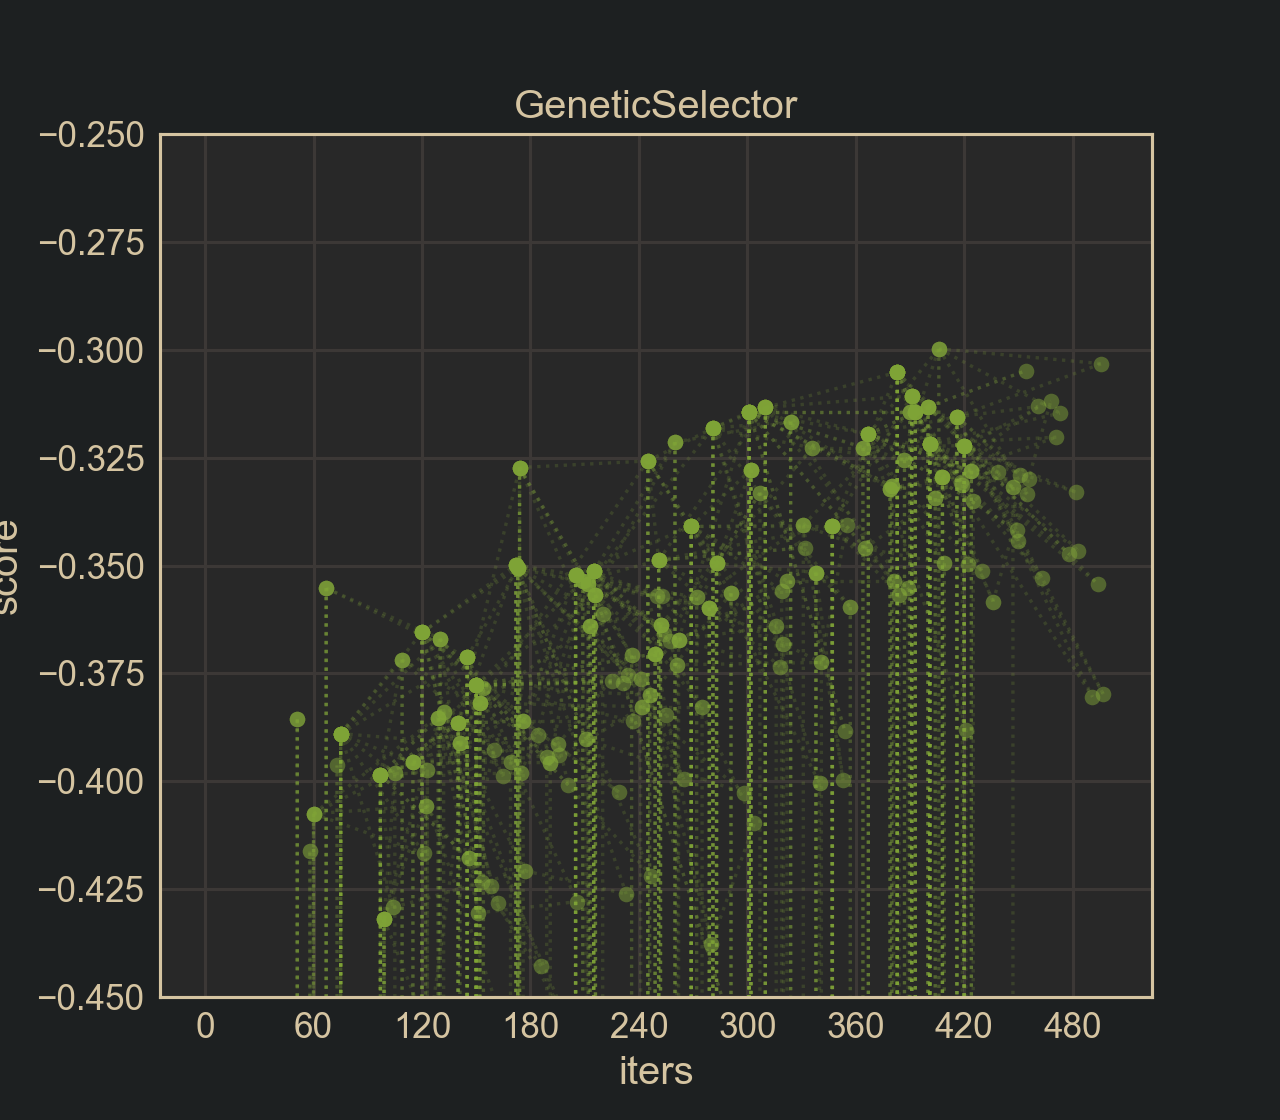

(-0.45, -0.25)

In [23]:
%matplotlib notebook

fig, ax = selector.plot_progress(marker='o', color='g', linestyle=':', alpha=0.2)
ax.set_ylim([-0.45, -0.25])

<IPython.core.display.Javascript object>


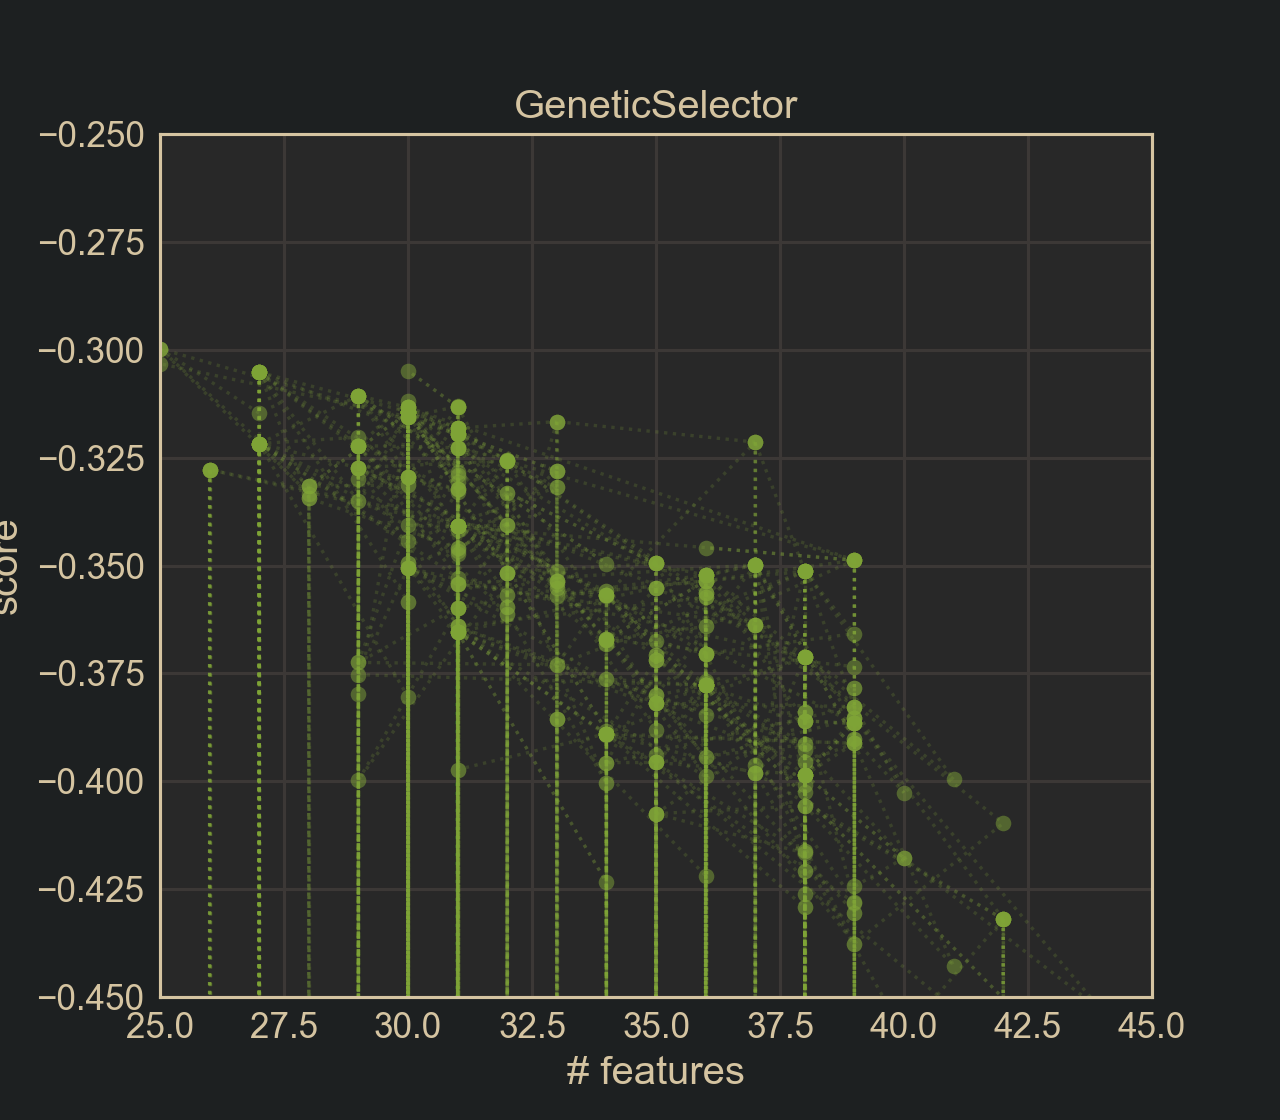

(-0.45, -0.25)

In [22]:
%matplotlib notebook

fig, ax = selector.plot_subset(marker='o', color='g', linestyle=':', alpha=0.2)
ax.set_xlim([25, 45])
ax.set_ylim([-0.45, -0.25])

In [9]:
X_train_ = selector.transform(X_train)
X_test_  = selector.transform(X_test)

_, y_pred = crossval_predict(model, cv, X_train_, y_train, X_new=X_test_,
                             scoring=scoring, verbose=2, n_jobs=-1)

get_score(y_test, y_pred)

[14:17:30]  LinearRegression

[14:17:30]  VAL 1:   -0.2259
[14:17:30]  VAL 2:   -0.3011
[14:17:30]  VAL 3:   -0.1658
[14:17:30]  VAL 4:   -0.3979
[14:17:30]  VAL 5:   -0.3326

[14:17:31]  VALID:   -0.2847 ± 0.0812



-0.334044238859755

In [10]:
selector.get_subset()

FeatureSubset(['x1' 'x2' 'x3' 'x4' 'x9' 'x11' 'x12' 'x13' 'x14' 'x16' 'x19' 'x23' 'x24'
               'x25' 'x28' 'x29' 'x30' 'x33' 'x34' 'x35' 'x36' 'x37' 'x38' 'x41' 'x44'
               'x46' 'x48' 'x49'])

# Differential Evolution (Group)

In [11]:
K = 3

FUNC = lambda i, k: lambda x: (i*k <= int(x[1:]) < i*k+k)
NAME = lambda i, k: 'x{}-x{}'.format(i*k, i*k+k-1)

prep_pipe = FeatureUnion([
    (NAME(i, K), make_pipeline(ColumnFilter(FUNC(i, K)), ColumnGrouper(NAME(i, K))))
    for i in range(X.shape[1] // K)
])

X_train_ = prep_pipe.fit_transform(X_train)
X_test_ = prep_pipe.transform(X_test)

X_train_

x0-x2                         x3-x5                         x6-x8  \
           x0        x1        x2        x3        x4        x5        x6   
114  1.485966  0.778927 -0.864385  0.359392 -0.032679  0.489878  0.207879   
173  0.486556  0.662671 -0.202896 -1.247124 -0.246749 -0.616115 -0.105831   
5   -0.330599  0.790063  1.548981 -0.849461 -1.105044  2.021317 -0.162607   
126 -0.654698  1.316721 -1.295193 -0.911042  1.553624 -0.391516 -0.984210   
117  0.547798  0.979453  1.566670 -0.626019 -0.577641  0.040761 -0.048920   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.072269  0.337595 -0.469959  1.327680 -1.798906  0.240452 -0.073671   
14   0.158424  0.797651  0.756336  0.003090 -0.756333 -0.269337 -1.304159   
92   0.776376  0.286092  0.742950 -0.053390  1.247804 -2.024651  1.252261   
179  0.706167 -0.521258 -1.523769  0.629821  0.250057 -0.123689  2.073668   
102 -0.430775  0.753842  0.884367 -0.505362 -0.072493 -1.016681  0.135661   

                           x9-x11  ...   x36-x38   x39-x41            \
           x7        x8        x9  ...       x38       x39       x40   
114  0.180076  0.666679 -0.113043  ... -0.669671  0.732318  0.125034   
173 -1.609836 -0.349269  0.752084  ... -0.216235 -0.485783  1.600479   
5   -1.313054 -0.450689  0.698708  ...  1.119375  0.092768  0.896283   
126  1.370630 -0.136763 -0.307159  ...  0.300158  0.313074  0.322048   
117 -0.626446  0.396027  0.704032  ...  0.047883  0.587833 -0.258746   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.194333  1.064415  0.487243  ... -1.086847 -1.675654 -1.685695   
14   0.122283  0.189931 -0.074461  ...  1.942678  0.567575  0.372224   
92   0.932424 -0.288082  1.483835  ... -1.645531  2.099876  0.197551   
179  0.710411  0.561340 -0.932788  ...  1.171574  0.723128 -0.200711   
102  0.619887  0.690728 -1.385902  ...  1.410827  0.233573 -0.388195   

                x42-x44                       x45-x47                      
          x41       x42       x43       x44       x45       x46       x47  
114  0.557775 -1.437116  1.455833  1.294962 -0.297914  0.797666 -1.940304  
173  0.866155 -0.351060  1.867120  2.178016  0.211479 -0.087349  0.839187  
5    2.338996 -0.599598 -0.215401  0.401894 -0.941990 -0.095353 -1.122985  
126 -0.621512  1.961456  0.406908  0.754801 -0.487516  0.427046 -1.915642  
117 -1.051844 -0.173477  1.052304 -0.397517 -1.202259  2.451374  1.006827  
..        ...       ...       ...       ...       ...       ...       ...  
106 -0.197992 -0.003539  0.835951 -0.894685 -0.413028  0.354867 -0.416709  
14  -0.254981  0.087314 -0.461267 -0.020971 -0.631183 -1.158640 -1.866925  
92   0.655423  3.142960  1.589010 -1.395082  0.231625  0.726760 -0.290150  
179 -0.222866  0.187542 -0.573948  0.540289 -0.288105  0.494209  0.038364  
102 -2.091578  1.086238  0.059108  0.946780  1.731445 -0.104947  1.278238  

[150 rows x 48 columns]

In [12]:
selector = GroupGeneticSelector(model, cv, scoring, n_gen=50, pop_size=30, mutation=0.05)
selector.fit(X_train_, y_train)

[14:17:31] GENERATION 1
[14:17:31] ITER: 1      SUBSET: 7/16      SCORE: -15889.0738 ± 3301.5729      
[14:17:31] ITER: 2      SUBSET: 12/16      SCORE: -5841.7258 ± 1899.0273      
[14:17:31] ITER: 3      SUBSET: 10/16      SCORE: -21502.1865 ± 3898.6074      
[14:17:31] ITER: 4      SUBSET: 6/16      SCORE: -11431.3851 ± 3807.5911      
[14:17:32] ITER: 5      SUBSET: 13/16      SCORE: -14638.4044 ± 2411.7759      
[14:17:32] ITER: 6      SUBSET: 13/16      SCORE: -5623.3131 ± 1855.7129      
[14:17:32] ITER: 7      SUBSET: 5/16      SCORE: -11498.9516 ± 2221.8652      
[14:17:32] ITER: 8      SUBSET: 4/16      SCORE: -18140.8807 ± 5274.9529      
[14:17:32] ITER: 9      SUBSET: 9/16      SCORE: -10741.6053 ± 2098.1310      
[14:17:32] ITER: 10      SUBSET: 6/16      SCORE: -10430.4748 ± 1865.9163      
[14:17:32] ITER: 11      SUBSET: 9/16      SCORE: -20908.3274 ± 4770.7341      
[14:17:32] ITER: 12      SUBSET: 9/16      SCORE: -11825.1063 ± 1053.3839      
[14:17:32] ITER: 13    

[14:17:37] ITER: 94      SUBSET: 12/16      SCORE: -19978.9120 ± 4165.1428      
[14:17:37] ITER: 95      SUBSET: 13/16      SCORE: -6248.3428 ± 2011.6099      
[14:17:37] ITER: 96      SUBSET: 14/16      SCORE: -5682.3674 ± 1140.9696      
[14:17:37] ITER: 97      SUBSET: 12/16      SCORE: -5194.0945 ± 1273.1154      
[14:17:37] ITER: 98      SUBSET: 13/16      SCORE: -5593.0144 ± 1724.2624      
[14:17:37] ITER: 99      SUBSET: 12/16      SCORE: -5496.6065 ± 1721.1201      
[14:17:38] ITER: 100      SUBSET: 11/16      SCORE: -4980.3526 ± 1229.4521      
[14:17:38] ITER: 101      SUBSET: 14/16      SCORE: -5881.5198 ± 2076.7379      
[14:17:38] ITER: 102      SUBSET: 12/16      SCORE: -13983.2136 ± 3138.0367      
[14:17:38] ITER: 103      SUBSET: 14/16      SCORE: -5740.1989 ± 1158.3986      
[14:17:38] ITER: 104      SUBSET: 13/16      SCORE: -7461.5902 ± 1457.3272      
[14:17:38] ITER: 105      SUBSET: 14/16      SCORE: -5740.1989 ± 1158.3986      
[14:17:38] ITER: 106      SUBSET

[14:17:44] ITER: 186      SUBSET: 10/16      SCORE: -11742.5633 ± 1582.8273      
[14:17:44] ITER: 187      SUBSET: 8/16      SCORE: -5729.7836 ± 823.4794      
[14:17:44] ITER: 188      SUBSET: 8/16      SCORE: -4329.4667 ± 1291.5657      
[14:17:44] ITER: 189      SUBSET: 11/16      SCORE: -5053.1235 ± 1488.6579      
[14:17:44] ITER: 190      SUBSET: 10/16      SCORE: -23293.4837 ± 6106.1046      
[14:17:44] ITER: 191      SUBSET: 13/16      SCORE: -6458.7126 ± 2245.9193      
[14:17:44] ITER: 192      SUBSET: 10/16      SCORE: -10708.5642 ± 1432.5826      
[14:17:44] ITER: 193      SUBSET: 14/16      SCORE: -6060.8459 ± 2217.4456      
[14:17:44] ITER: 194      SUBSET: 8/16      SCORE: -11287.4755 ± 853.0036      
[14:17:44] ITER: 195      SUBSET: 11/16      SCORE: -5020.6544 ± 1338.7334      
[14:17:44] ITER: 196      SUBSET: 10/16      SCORE: -20615.7604 ± 2122.3499      
[14:17:44] ITER: 197      SUBSET: 12/16      SCORE: -5340.8378 ± 1130.9443      
[14:17:44] ITER: 198      SU

[14:17:49] ITER: 280      SUBSET: 8/16      SCORE: -12445.7743 ± 2175.1460      
[14:17:49] ITER: 281      SUBSET: 10/16      SCORE: -15694.0732 ± 2741.0190      
[14:17:49] ITER: 282      SUBSET: 13/16      SCORE: -7288.9410 ± 1822.7250      
[14:17:49] ITER: 283      SUBSET: 10/16      SCORE: -6011.0933 ± 1604.6337      
[14:17:49] ITER: 284      SUBSET: 7/16      SCORE: -27257.3678 ± 6421.6855      
[14:17:49] ITER: 285      SUBSET: 12/16      SCORE: -7466.1756 ± 1770.1716      
[14:17:50] ITER: 286      SUBSET: 9/16      SCORE: -15579.2694 ± 3787.3983      
[14:17:50] ITER: 287      SUBSET: 10/16      SCORE: -6492.3392 ± 860.7145      
[14:17:50] ITER: 288      SUBSET: 10/16      SCORE: -5071.4006 ± 2025.8780      
[14:17:50] ITER: 289      SUBSET: 13/16      SCORE: -5781.4906 ± 2164.9119      
[14:17:50] ITER: 290      SUBSET: 9/16      SCORE: -10781.8860 ± 2772.7709      
[14:17:50] ITER: 291      SUBSET: 8/16      SCORE: -12480.6394 ± 895.2635      
[14:17:50] ITER: 292      SUB

[14:17:55] ITER: 376      SUBSET: 7/16      SCORE: -4632.7599 ± 981.8045      
[14:17:55] ITER: 377      SUBSET: 8/16      SCORE: -13699.6915 ± 2396.7846      
[14:17:55] ITER: 378      SUBSET: 7/16      SCORE: -25424.0622 ± 5272.9266      
[14:17:55] ITER: 379      SUBSET: 7/16      SCORE: -16919.3255 ± 2748.4831      
[14:17:55] ITER: 380      SUBSET: 7/16      SCORE: -21788.1944 ± 5736.4864      
[14:17:55] ITER: 381      SUBSET: 8/16      SCORE: -17849.7148 ± 4966.6974      
[14:17:55] ITER: 382      SUBSET: 11/16      SCORE: -6104.5370 ± 953.1452      
[14:17:55] ITER: 383      SUBSET: 7/16      SCORE: -4391.9235 ± 1025.5853      
[14:17:55] ITER: 384      SUBSET: 8/16      SCORE: -22210.6099 ± 5891.0342      
[14:17:55] ITER: 385      SUBSET: 9/16      SCORE: -13759.0335 ± 2222.0181      
[14:17:56] ITER: 386      SUBSET: 8/16      SCORE: -6507.5420 ± 1490.3803      
[14:17:56] ITER: 387      SUBSET: 9/16      SCORE: -20189.9326 ± 4522.6059      
[14:17:56] ITER: 388      SUBSET:

[14:18:01] ITER: 471      SUBSET: 8/16      SCORE: -12182.7824 ± 2468.7724      
[14:18:01] ITER: 472      SUBSET: 8/16      SCORE: -11800.3855 ± 1394.9834      
[14:18:01] ITER: 473      SUBSET: 10/16      SCORE: -11759.7674 ± 3631.2923      
[14:18:01] ITER: 474      SUBSET: 7/16      SCORE: -11316.1702 ± 1589.4126      
[14:18:01] ITER: 475      SUBSET: 6/16      SCORE: -11255.9715 ± 2528.5839      
[14:18:01] ITER: 476      SUBSET: 11/16      SCORE: -14609.1605 ± 3793.7728      
[14:18:01] ITER: 477      SUBSET: 7/16      SCORE: -17758.5247 ± 5496.2752      
[14:18:01] ITER: 478      SUBSET: 6/16      SCORE: -16241.9178 ± 4446.3679      
[14:18:01] ITER: 479      SUBSET: 9/16      SCORE: -4881.3162 ± 1656.4830      
[14:18:02] ITER: 480      SUBSET: 6/16      SCORE: -4522.3698 ± 972.2663      

[14:18:02] SCORE AVG: -10955.9512 ± 5267.8703
[14:18:02] SCORE MIN: -22362.4441
[14:18:02] SCORE MAX: -4460.3959

[14:18:02] SIZE AVG: 8 ± 1
[14:18:02] SIZE MIN: 6
[14:18:02] SIZE MAX: 12

[

[14:18:07] ITER: 564      SUBSET: 11/16      SCORE: -6266.7985 ± 1322.2256      
[14:18:07] ITER: 565      SUBSET: 8/16      SCORE: -11920.6917 ± 1672.9982      
[14:18:07] ITER: 566      SUBSET: 7/16      SCORE: -5737.0757 ± 1263.1542      
[14:18:07] ITER: 567      SUBSET: 10/16      SCORE: -5296.5418 ± 1104.7425      
[14:18:07] ITER: 568      SUBSET: 6/16      SCORE: -13656.2018 ± 3897.5567      
[14:18:07] ITER: 569      SUBSET: 9/16      SCORE: -12206.8841 ± 2266.8078      
[14:18:07] ITER: 570      SUBSET: 6/16      SCORE: -20334.4418 ± 4191.5145      

[14:18:07] SCORE AVG: -10698.2389 ± 5196.6981
[14:18:07] SCORE MIN: -22004.6558
[14:18:07] SCORE MAX: -4179.9175

[14:18:07] SIZE AVG: 8 ± 2
[14:18:07] SIZE MIN: 4
[14:18:07] SIZE MAX: 11

[14:18:07] TIME AVG: 37 ms
[14:18:07] TIME SUM: 1 sec

[14:18:07] GENERATION 20
[14:18:07] ITER: 571      SUBSET: 9/16      SCORE: -20494.2523 ± 4760.5654      
[14:18:07] ITER: 572      SUBSET: 7/16      SCORE: -10698.9124 ± 2159.1396      
[1

[14:18:12] ITER: 656      SUBSET: 7/16      SCORE: -11231.9458 ± 2080.6556      
[14:18:12] ITER: 657      SUBSET: 7/16      SCORE: -4550.1092 ± 1156.3442      
[14:18:12] ITER: 658      SUBSET: 5/16      SCORE: -13428.7441 ± 3842.0154      
[14:18:12] ITER: 659      SUBSET: 7/16      SCORE: -11177.7373 ± 3913.8806      
[14:18:12] ITER: 660      SUBSET: 7/16      SCORE: -4272.3266 ± 1151.7769      

[14:18:12] SCORE AVG: -10638.0786 ± 5878.8908
[14:18:12] SCORE MIN: -23757.3537
[14:18:12] SCORE MAX: -4073.3455

[14:18:12] SIZE AVG: 6 ± 1
[14:18:12] SIZE MIN: 4
[14:18:12] SIZE MAX: 11

[14:18:12] TIME AVG: 46 ms
[14:18:12] TIME SUM: 1 sec

[14:18:12] GENERATION 23
[14:18:13] ITER: 661      SUBSET: 7/16      SCORE: -11167.1228 ± 2098.0177      
[14:18:13] ITER: 662      SUBSET: 10/16      SCORE: -5108.1274 ± 1573.7254      
[14:18:13] ITER: 663      SUBSET: 5/16      SCORE: -14236.5447 ± 3321.5796      
[14:18:13] ITER: 664      SUBSET: 8/16      SCORE: -4380.9445 ± 917.8125      
[14:1

[14:18:18] ITER: 749      SUBSET: 12/16      SCORE: -5895.2736 ± 2059.9249      
[14:18:18] ITER: 750      SUBSET: 8/16      SCORE: -16632.5631 ± 4430.7750      

[14:18:18] SCORE AVG: -10069.1888 ± 6197.8800
[14:18:18] SCORE MIN: -24033.9213
[14:18:18] SCORE MAX: -4272.3266

[14:18:18] SIZE AVG: 9 ± 1
[14:18:18] SIZE MIN: 6
[14:18:18] SIZE MAX: 13

[14:18:18] TIME AVG: 48 ms
[14:18:18] TIME SUM: 1 sec

[14:18:18] GENERATION 26
[14:18:18] ITER: 751      SUBSET: 9/16      SCORE: -19829.1688 ± 5000.9106      
[14:18:18] ITER: 752      SUBSET: 7/16      SCORE: -19951.2463 ± 5447.5541      
[14:18:18] ITER: 753      SUBSET: 9/16      SCORE: -4490.7881 ± 1099.0292      
[14:18:18] ITER: 754      SUBSET: 8/16      SCORE: -4687.7761 ± 1071.2948      
[14:18:18] ITER: 755      SUBSET: 8/16      SCORE: -11987.9308 ± 1944.2136      
[14:18:18] ITER: 756      SUBSET: 11/16      SCORE: -5192.1057 ± 1412.2180      
[14:18:19] ITER: 757      SUBSET: 9/16      SCORE: -4504.2182 ± 1397.4819      
[14:


[14:18:24] TIME AVG: 40 ms
[14:18:24] TIME SUM: 1 sec

[14:18:24] GENERATION 29
[14:18:24] ITER: 841      SUBSET: 9/16      SCORE: -4990.8880 ± 1856.8439      
[14:18:24] ITER: 842      SUBSET: 10/16      SCORE: -4746.2298 ± 1544.1484      
[14:18:24] ITER: 843      SUBSET: 8/16      SCORE: -4445.5030 ± 882.3437      
[14:18:24] ITER: 844      SUBSET: 8/16      SCORE: -18451.0996 ± 5468.9972      
[14:18:24] ITER: 845      SUBSET: 7/16      SCORE: -11476.5780 ± 1469.5710      
[14:18:24] ITER: 846      SUBSET: 7/16      SCORE: -19569.3350 ± 3965.0293      
[14:18:24] ITER: 847      SUBSET: 8/16      SCORE: -4563.9761 ± 1238.6530      
[14:18:24] ITER: 848      SUBSET: 10/16      SCORE: -11869.5559 ± 1988.0585      
[14:18:24] ITER: 849      SUBSET: 9/16      SCORE: -4640.9291 ± 814.5179      
[14:18:24] ITER: 850      SUBSET: 8/16      SCORE: -19237.4626 ± 6054.5710      
[14:18:24] ITER: 851      SUBSET: 8/16      SCORE: -12433.7210 ± 2859.3944      
[14:18:24] ITER: 852      SUBSET:

[14:18:29] ITER: 932      SUBSET: 10/16      SCORE: -13501.5631 ± 3710.8260      
[14:18:29] ITER: 933      SUBSET: 10/16      SCORE: -13627.4970 ± 3330.3699      
[14:18:29] ITER: 934      SUBSET: 12/16      SCORE: -5756.9561 ± 1925.1218      
[14:18:30] ITER: 935      SUBSET: 9/16      SCORE: -5774.8149 ± 1040.4821      
[14:18:30] ITER: 936      SUBSET: 8/16      SCORE: -19219.7990 ± 5341.9637      
[14:18:30] ITER: 937      SUBSET: 7/16      SCORE: -16176.0025 ± 2597.9428      
[14:18:30] ITER: 938      SUBSET: 9/16      SCORE: -4592.2744 ± 1039.6917      
[14:18:30] ITER: 939      SUBSET: 10/16      SCORE: -12100.7455 ± 1909.3918      
[14:18:30] ITER: 940      SUBSET: 9/16      SCORE: -6201.6142 ± 946.3844      
[14:18:30] ITER: 941      SUBSET: 8/16      SCORE: -5053.4956 ± 1344.0899      
[14:18:30] ITER: 942      SUBSET: 9/16      SCORE: -4963.5284 ± 1462.0920      
[14:18:30] ITER: 943      SUBSET: 10/16      SCORE: -14025.2033 ± 1930.8134      
[14:18:30] ITER: 944      SUBS

[14:18:35] ITER: 1026      SUBSET: 9/16      SCORE: -12399.7158 ± 1706.8613      
[14:18:35] ITER: 1027      SUBSET: 8/16      SCORE: -11841.0927 ± 2058.6310      
[14:18:36] ITER: 1028      SUBSET: 8/16      SCORE: -25537.4109 ± 3731.8200      
[14:18:36] ITER: 1029      SUBSET: 5/16      SCORE: -23569.5056 ± 4675.7301      
[14:18:36] ITER: 1030      SUBSET: 10/16      SCORE: -13388.8988 ± 2413.9001      
[14:18:36] ITER: 1031      SUBSET: 12/16      SCORE: -5175.7539 ± 1405.8851      
[14:18:36] ITER: 1032      SUBSET: 10/16      SCORE: -6147.9549 ± 776.3711      
[14:18:36] ITER: 1033      SUBSET: 10/16      SCORE: -4783.4283 ± 1032.8039      
[14:18:36] ITER: 1034      SUBSET: 8/16      SCORE: -16222.3023 ± 4338.5538      
[14:18:36] ITER: 1035      SUBSET: 9/16      SCORE: -4854.2825 ± 901.2285      
[14:18:36] ITER: 1036      SUBSET: 8/16      SCORE: -12148.9681 ± 1820.9043      
[14:18:36] ITER: 1037      SUBSET: 9/16      SCORE: -4990.8880 ± 1856.8439      
[14:18:36] ITER: 10

[14:18:41] ITER: 1116      SUBSET: 10/16      SCORE: -5122.5192 ± 1342.3657      
[14:18:41] ITER: 1117      SUBSET: 10/16      SCORE: -11471.6176 ± 2676.5146      
[14:18:41] ITER: 1118      SUBSET: 10/16      SCORE: -5314.3016 ± 1176.4080      
[14:18:41] ITER: 1119      SUBSET: 8/16      SCORE: -10399.8106 ± 2082.6857      
[14:18:41] ITER: 1120      SUBSET: 10/16      SCORE: -21424.1141 ± 5508.4332      
[14:18:41] ITER: 1121      SUBSET: 8/16      SCORE: -5092.6871 ± 1462.5937      
[14:18:41] ITER: 1122      SUBSET: 11/16      SCORE: -5136.7980 ± 1101.9326      
[14:18:42] ITER: 1123      SUBSET: 8/16      SCORE: -11363.9323 ± 2491.6242      
[14:18:42] ITER: 1124      SUBSET: 10/16      SCORE: -5574.4539 ± 1501.8066      
[14:18:42] ITER: 1125      SUBSET: 8/16      SCORE: -4787.1045 ± 1132.7443      
[14:18:42] ITER: 1126      SUBSET: 9/16      SCORE: -11371.5073 ± 2578.9516      
[14:18:42] ITER: 1127      SUBSET: 9/16      SCORE: -5023.2750 ± 1461.1389      
[14:18:42] ITER: 

[14:18:47] ITER: 1206      SUBSET: 12/16      SCORE: -18140.9395 ± 3108.0639      
[14:18:47] ITER: 1207      SUBSET: 12/16      SCORE: -6170.4035 ± 2365.2894      
[14:18:47] ITER: 1208      SUBSET: 11/16      SCORE: -5802.8757 ± 1824.6929      
[14:18:47] ITER: 1209      SUBSET: 7/16      SCORE: -5777.4576 ± 952.9212      
[14:18:47] ITER: 1210      SUBSET: 9/16      SCORE: -11756.3300 ± 1479.3424      
[14:18:47] ITER: 1211      SUBSET: 9/16      SCORE: -12813.7729 ± 1698.2291      
[14:18:47] ITER: 1212      SUBSET: 8/16      SCORE: -11788.3720 ± 1768.5110      
[14:18:47] ITER: 1213      SUBSET: 10/16      SCORE: -4715.0351 ± 1152.7526      
[14:18:47] ITER: 1214      SUBSET: 9/16      SCORE: -11290.2397 ± 1913.3223      
[14:18:47] ITER: 1215      SUBSET: 10/16      SCORE: -6280.6052 ± 982.9473      
[14:18:47] ITER: 1216      SUBSET: 12/16      SCORE: -5498.3921 ± 1830.6744      
[14:18:47] ITER: 1217      SUBSET: 7/16      SCORE: -12749.0787 ± 3776.3995      
[14:18:47] ITER: 1

[14:18:53] ITER: 1299      SUBSET: 7/16      SCORE: -11110.9653 ± 1288.6490      
[14:18:53] ITER: 1300      SUBSET: 6/16      SCORE: -14588.3444 ± 3926.4435      
[14:18:53] ITER: 1301      SUBSET: 8/16      SCORE: -5024.5551 ± 1513.2859      
[14:18:53] ITER: 1302      SUBSET: 9/16      SCORE: -4706.8947 ± 1015.7020      
[14:18:53] ITER: 1303      SUBSET: 9/16      SCORE: -4819.5619 ± 1920.9895      
[14:18:53] ITER: 1304      SUBSET: 7/16      SCORE: -11586.4119 ± 1795.0095      
[14:18:53] ITER: 1305      SUBSET: 8/16      SCORE: -17608.5213 ± 3615.7964      
[14:18:53] ITER: 1306      SUBSET: 9/16      SCORE: -10894.0376 ± 1553.2178      
[14:18:53] ITER: 1307      SUBSET: 6/16      SCORE: -10888.9665 ± 1771.4527      
[14:18:53] ITER: 1308      SUBSET: 7/16      SCORE: -4911.8504 ± 1348.6717      
[14:18:53] ITER: 1309      SUBSET: 9/16      SCORE: -12530.5051 ± 2987.8025      
[14:18:53] ITER: 1310      SUBSET: 9/16      SCORE: -5336.6415 ± 1363.2977      
[14:18:53] ITER: 1311

[14:18:59] ITER: 1391      SUBSET: 11/16      SCORE: -5636.2061 ± 1403.1872      
[14:18:59] ITER: 1392      SUBSET: 10/16      SCORE: -5984.2901 ± 1150.8525      
[14:18:59] ITER: 1393      SUBSET: 13/16      SCORE: -6066.1893 ± 1906.4545      
[14:18:59] ITER: 1394      SUBSET: 9/16      SCORE: -5855.0063 ± 1125.6118      
[14:18:59] ITER: 1395      SUBSET: 10/16      SCORE: -5276.9044 ± 1373.5933      
[14:18:59] ITER: 1396      SUBSET: 10/16      SCORE: -13183.9620 ± 1564.5538      
[14:18:59] ITER: 1397      SUBSET: 10/16      SCORE: -4776.7270 ± 1640.9870      
[14:18:59] ITER: 1398      SUBSET: 10/16      SCORE: -6360.3848 ± 1173.2734      
[14:18:59] ITER: 1399      SUBSET: 12/16      SCORE: -5703.6037 ± 1631.3489      
[14:18:59] ITER: 1400      SUBSET: 11/16      SCORE: -5615.7202 ± 1627.2724      
[14:18:59] ITER: 1401      SUBSET: 12/16      SCORE: -5430.4016 ± 1600.8136      
[14:18:59] ITER: 1402      SUBSET: 11/16      SCORE: -15318.0336 ± 4432.7419      
[14:18:59] ITER

[14:19:05] ITER: 1482      SUBSET: 7/16      SCORE: -10803.1521 ± 1609.7887      
[14:19:05] ITER: 1483      SUBSET: 11/16      SCORE: -16434.5391 ± 3272.8180      
[14:19:05] ITER: 1484      SUBSET: 9/16      SCORE: -11374.3253 ± 2400.7594      
[14:19:05] ITER: 1485      SUBSET: 10/16      SCORE: -15553.2368 ± 3397.4025      
[14:19:05] ITER: 1486      SUBSET: 10/16      SCORE: -12009.9191 ± 2334.8371      
[14:19:05] ITER: 1487      SUBSET: 9/16      SCORE: -4619.2583 ± 1313.8530      
[14:19:05] ITER: 1488      SUBSET: 9/16      SCORE: -18100.1286 ± 3684.2136      
[14:19:05] ITER: 1489      SUBSET: 13/16      SCORE: -5596.1826 ± 1178.9838      
[14:19:05] ITER: 1490      SUBSET: 10/16      SCORE: -4776.9673 ± 1346.3884      
[14:19:05] ITER: 1491      SUBSET: 12/16      SCORE: -5162.9681 ± 1692.6976      
[14:19:05] ITER: 1492      SUBSET: 9/16      SCORE: -10371.3474 ± 2424.5670      
[14:19:05] ITER: 1493      SUBSET: 11/16      SCORE: -15592.4948 ± 2675.0870      
[14:19:05] IT

GroupGeneticSelector(crossover='one', cv=5,
                     estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                     max_features=0.9, max_time=None, min_features=0.1,
                     mutation=0.05, n_digits=4, n_gen=50, n_jobs=None,
                     pop_size=30, random_state=None,
                     scoring='neg_mean_squared_error', verbose=1)

<IPython.core.display.Javascript object>


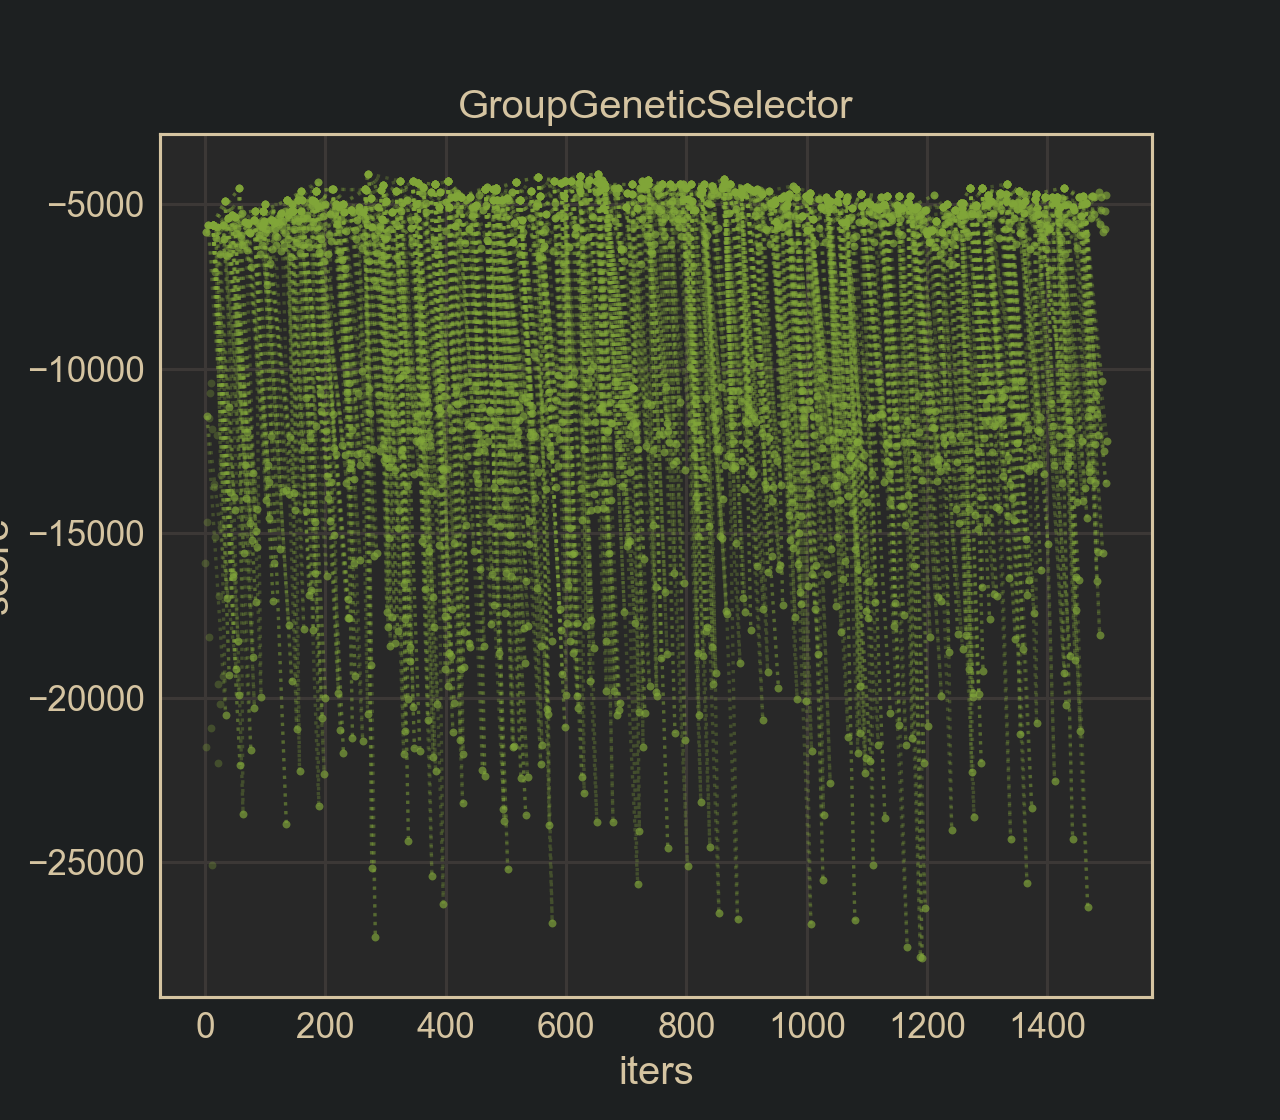

In [13]:
%matplotlib notebook

fig, ax = selector.plot_progress(marker='.', color='g', linestyle=':', alpha=0.3)

In [14]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train_[subset], y_train, X_new=X_test_[subset],
                             scoring=scoring, verbose=2, n_jobs=-1)

get_score(y_test, y_pred)

[14:19:32]  LinearRegression

[14:19:32]  VAL 1:   -3635.0935
[14:19:32]  VAL 2:   -3462.1338
[14:19:32]  VAL 3:   -5548.4850
[14:19:32]  VAL 4:   -4497.4197
[14:19:32]  VAL 5:   -3180.1247

[14:19:32]  VALID:   -4064.6513 ± 862.4367



-5380.227215585138

In [15]:
subset

FeatureSubset(Index(['x3-x5', 'x6-x8', 'x27-x29', 'x30-x32', 'x36-x38', 'x42-x44'], dtype='object'))